In [8]:
# raytracing tutorial
# 08- recursive raytracing with a simple scene

In [9]:
import numpy
import matplotlib.pyplot as plt
import math

# plot images in this notebook
%matplotlib inline

In [10]:
# axes x to the right, y upwards. z into the screen (left hand rule)

In [11]:
# sphere object

class Sphere():
    
    def __init__(self, x, y, z, r):
        self.centre = numpy.array([x,y,z])
        self.radius = r
        pass
    
    def status(self):
        print("centre = ", self.centre)
        print("radius = ", self.radius)
        pass

    def intersection(self, camera_location, ray_direction_vector):
        # calculate quadratic determinant "b^2 - 4ac" for ray intersecting circle
        b = numpy.dot(2 * ray_direction_vector,(camera_location - self.centre))
        b2 = b*b
        a = numpy.dot(ray_direction_vector, ray_direction_vector)
        c = numpy.dot((self.centre - camera_location), (self.centre - camera_location)) - (self.radius * self.radius)
        delta = b2 - (4 * a * c)
        #print(delta)
        
        if (delta >= 0):
            # calculate nearest point (lowest t)
            t = (-b - math.sqrt(delta)) / (2 * a)
            intersection_point = camera_location + (t * ray_direction_vector)
            
            # calculate normal at surface
            normal = (intersection_point - self.centre) / numpy.linalg.norm(intersection_point - self.centre)
            
            # return tuple (intersection yes/no, nearest point, normal)
            return (delta>0, intersection_point, normal)
            pass
        
        # return tuple (intersection yes/no, nearest point, norm)
        return (delta >= 0, 0, 0)

In [12]:
# camera location
camera_location = numpy.array([0,0,-100])

# view port
view_port_location = numpy.array([-10, 0, 0])
view_port_width = 20
view_port_height = 20

# resolution (pixels per unit distance)
resolution = 4

In [13]:
# light source

# light is at above right, and a bit forward
light_location = numpy.array([100, 100, -50])


In [15]:
# scene is a list of objects
scene_objects = []

# add sphere
scene_objects.append(Sphere(0,10,10,5))

# get status of each object
for obj in scene_objects:
    obj.status()
    pass

centre =  [ 0 10 10]
radius =  5


In [16]:
# create image

image = numpy.zeros([view_port_width * resolution, view_port_height * resolution, 3], dtype='float64')
print("image shape = ", image.shape)

image shape =  (80, 80, 3)


In [30]:
# max ray tracing depth for scene
max_depth = 2

# recursive ray function
def ray(ray_direction, depth):
    
    # for each object in scene check intersection to find nearest
    nearest_point = False
    for obj in scene_objects:
        intersection = obj.intersection(camera_location, ray_direction)
        if intersection[0]:
            # intersection happened
            # depth dividor means light dropoff as light gets weaker over distance
            colour_contribution = numpy.array([0.99/depth, 0, 0])
            pass
        else:
            # no intersection
            # calculate background sky pixel colour from vertical direction of ray
            colour_contribution = numpy.array([0, 0, ray_direction[1]*3 ])
            pass
    
    # fire off new ray
    if (depth < max_depth):
        colour_contribution += ray(ray_direction, depth+1)
        pass
    
    return colour_contribution

In [31]:
# main loop is to consider every pixel of the viewport

for pixel_ix in range(image.shape[0]):
    for pixel_iy in range(image.shape[1]):
        
        # ray direction
        current_position = view_port_location + numpy.array([pixel_ix/resolution, pixel_iy/resolution, 0])
        ray_direction = current_position - camera_location
        ray_direction /= numpy.linalg.norm(ray_direction)
        
        # pixel is set to colour contribution from (recursive) ray
        image[pixel_ix, pixel_iy] = ray(ray_direction, 1)
        
        pass
    pass

In [32]:
# apply squashing function to image
# first shift data into range [0,1] asymptotically
# then remap to colour RGB range [0,255] dtype=uint8

# squash with tanh()
image = numpy.tanh(image)

# remap to RGB range
image_rgb = numpy.array(image*255, dtype='uint8')

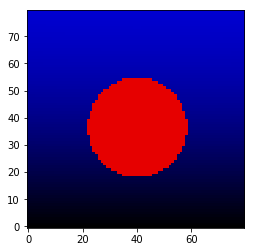

In [33]:
# transpose array so origin is bottom left, by swapping dimensions 0 and 1, but leave dimension 3

image_rgb2 = numpy.transpose(image_rgb, (1, 0, 2))
plt.imshow(image_rgb2, origin='lower')

In [21]:
#plt.imsave('test.png', image_rgb2, origin='lower')